In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import pandas as pd
movies = pd.read_csv('/kaggle/input/movielens100k/movies.csv')
ratings = pd.read_csv('/kaggle/input/movielens100k/ratings.csv')
print(movies)
print(ratings)

      movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
...       ...                                                ...   
9120   162672                                Mohenjo Daro (2016)   
9121   163056                               Shin Godzilla (2016)   
9122   163949  The Beatles: Eight Days a Week - The Touring Y...   
9123   164977                           The Gay Desperado (1936)   
9124   164979                              Women of '69, Unboxed   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [15]:
print(movies.shape, ratings.shape)


(9125, 3) (100004, 4)


In [22]:
# Check missing values
print("\nMissing values in Movies:", movies.isnull().sum())
print("Missing values in Ratings:", ratings.isnull().sum())

# Drop missing values if any


Missing values in Movies: movieId    0
title      0
genres     0
dtype: int64
Missing values in Ratings: userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [17]:
print(movies.dtypes)
print(ratings.dtypes)


movieId     int64
title      object
genres     object
dtype: object
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [20]:
# Drop missing rows
ratings.dropna(inplace=True)

# Or fill missing values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())
print(ratings)

        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]


In [24]:
ratings['rating_normalized'] = (ratings['rating'] - ratings['rating'].min()) / (ratings['rating'].max() - ratings['rating'].min())
print(ratings)

        userId  movieId  rating   timestamp  rating_normalized
0            1       31     2.5  1260759144           0.444444
1            1     1029     3.0  1260759179           0.555556
2            1     1061     3.0  1260759182           0.555556
3            1     1129     2.0  1260759185           0.333333
4            1     1172     4.0  1260759205           0.777778
...        ...      ...     ...         ...                ...
99999      671     6268     2.5  1065579370           0.444444
100000     671     6269     4.0  1065149201           0.777778
100001     671     6365     4.0  1070940363           0.777778
100002     671     6385     2.5  1070979663           0.444444
100003     671     6565     3.5  1074784724           0.666667

[100004 rows x 5 columns]


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
movies = pd.read_csv("/kaggle/input/movielens100k/movies.csv")
ratings = pd.read_csv("/kaggle/input/movielens100k/ratings.csv")

# Drop missing values
movies.dropna(subset=['movieId', 'title'], inplace=True)
ratings.dropna(inplace=True)
print(movies)
print(ratings)

      movieId                                              title  \
0           1                                   Toy Story (1995)   
1           2                                     Jumanji (1995)   
2           3                            Grumpier Old Men (1995)   
3           4                           Waiting to Exhale (1995)   
4           5                 Father of the Bride Part II (1995)   
...       ...                                                ...   
9120   162672                                Mohenjo Daro (2016)   
9121   163056                               Shin Godzilla (2016)   
9122   163949  The Beatles: Eight Days a Week - The Touring Y...   
9123   164977                           The Gay Desperado (1936)   
9124   164979                              Women of '69, Unboxed   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [29]:
print(movies.head())
print(ratings.head())
print("Movies shape:", movies.shape)
print("Ratings shape:", ratings.shape)


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205
Movies shape: (9125, 3)
Ratings shape: (100004, 4)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


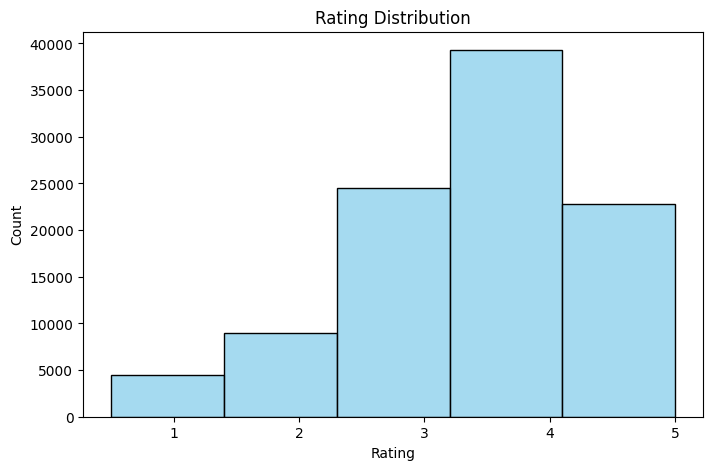

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=5, kde=False, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


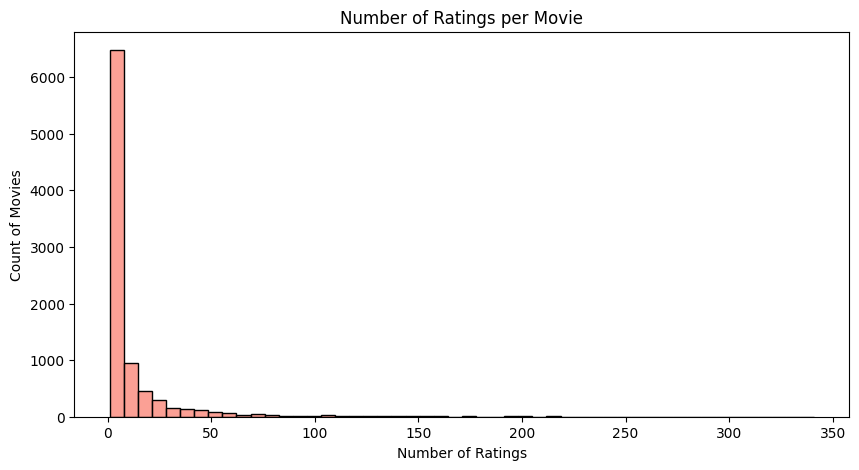

In [31]:
ratings_per_movie = ratings.groupby('movieId').size().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_movie, bins=50, color='salmon')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Movies')
plt.show()


In [32]:
top_movies = ratings_per_movie.head(10).index
top_movies_df = movies[movies['movieId'].isin(top_movies)]
print("Top 10 most rated movies:\n", top_movies_df[['movieId','title']])


Top 10 most rated movies:
       movieId                                      title
0           1                           Toy Story (1995)
232       260  Star Wars: Episode IV - A New Hope (1977)
266       296                        Pulp Fiction (1994)
284       318           Shawshank Redemption, The (1994)
321       356                        Forrest Gump (1994)
427       480                       Jurassic Park (1993)
472       527                    Schindler's List (1993)
522       589          Terminator 2: Judgment Day (1991)
525       593           Silence of the Lambs, The (1991)
2062     2571                         Matrix, The (1999)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


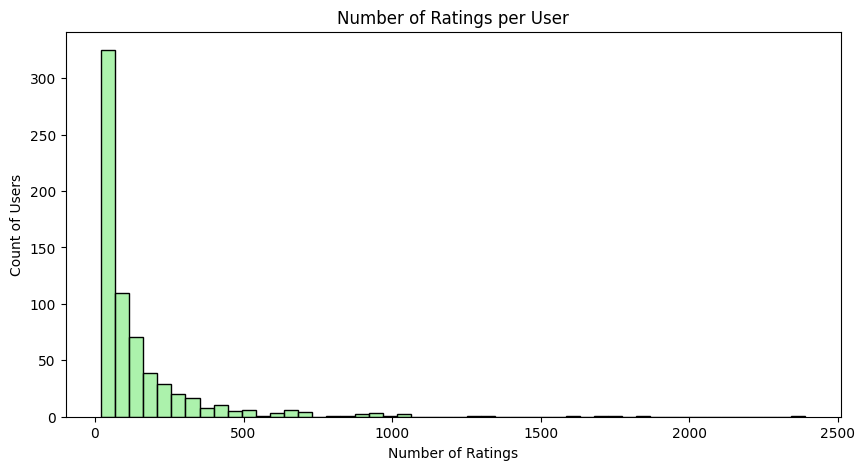

In [33]:
ratings_per_user = ratings.groupby('userId').size().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user, bins=50, color='lightgreen')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


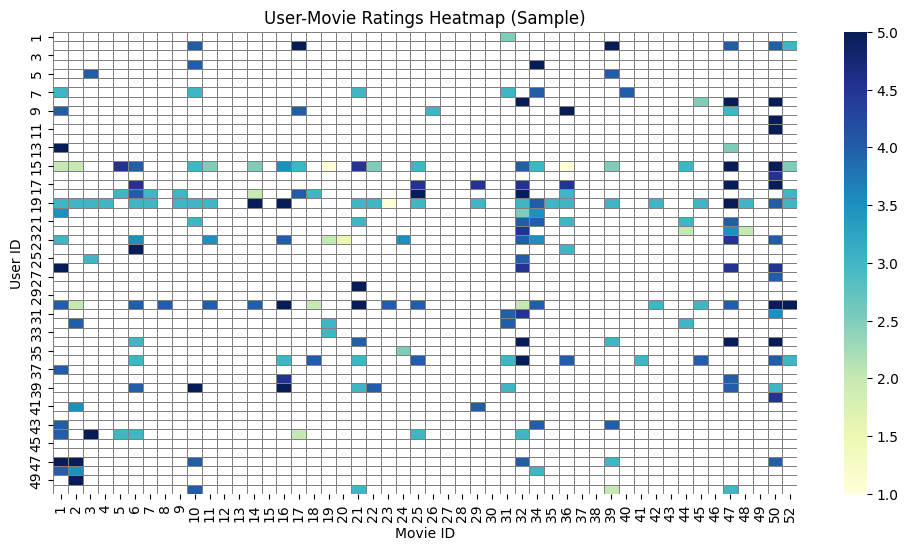

In [34]:
sample_ratings = ratings.pivot(index='userId', columns='movieId', values='rating').iloc[:50, :50]

plt.figure(figsize=(12,6))
sns.heatmap(sample_ratings, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('User-Movie Ratings Heatmap (Sample)')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()


In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from surprise import Dataset, Reader, SVD, NMF, KNNBasic
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae

# Load data
ratings = pd.read_csv("/kaggle/input/movielens100k/ratings.csv")

# Surprise needs a Reader object to define rating scale
reader = Reader(rating_scale=(ratings['rating'].min(), ratings['rating'].max()))

# Load dataset into Surprise format
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split data
trainset, testset = train_test_split(data, test_size=0.2)
print(ratings)

In [4]:
# User-based CF
user_cf = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
user_cf.fit(trainset)

# Predict on testset
predictions_user = user_cf.test(testset)

# Evaluate
print("User-based CF Performance:")
rmse(predictions_user)
mae(predictions_user)


Computing the cosine similarity matrix...
Done computing similarity matrix.
User-based CF Performance:
RMSE: 1.0004
MAE:  0.7718


0.7717856639289885

In [5]:
# Item-based CF
item_cf = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})
item_cf.fit(trainset)

# Predict on testset
predictions_item = item_cf.test(testset)

# Evaluate
print("Item-based CF Performance:")
rmse(predictions_item)
mae(predictions_item)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Item-based CF Performance:
RMSE: 0.9872
MAE:  0.7705


0.7705318026483924

In [6]:
# SVD Model
svd_model = SVD()
svd_model.fit(trainset)
predictions_svd = svd_model.test(testset)

print("SVD Performance:")
rmse(predictions_svd)
mae(predictions_svd)


SVD Performance:
RMSE: 0.8946
MAE:  0.6897


0.6897290034179956

In [7]:
# NMF Model
nmf_model = NMF()
nmf_model.fit(trainset)
predictions_nmf = nmf_model.test(testset)

print("NMF Performance:")
rmse(predictions_nmf)
mae(predictions_nmf)


NMF Performance:
RMSE: 0.9505
MAE:  0.7295


0.7295348087577636

In [8]:
from collections import defaultdict

def precision_at_k(predictions, k=5, threshold=3.5):
    # Map predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    precisions = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        top_k = user_ratings[:k]
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in top_k)
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in top_k)
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

    return sum(prec for prec in precisions.values()) / len(precisions)

# Example: Precision@5 for SVD
prec_at_5 = precision_at_k(predictions_svd, k=5)
print("Precision@5 (SVD):", prec_at_5)


Precision@5 (SVD): 0.7441293532338329


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load movies data
movies = pd.read_csv("/kaggle/input/movielens100k/movies.csv")

# Check structure
print(movies.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [10]:
# Replace NaN with empty string
movies['genres'] = movies['genres'].fillna('')

# Combine title and genres for better representation
movies['metadata'] = movies['title'] + " " + movies['genres']


In [11]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['metadata'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")


TF-IDF matrix shape: (9125, 8705)


In [13]:
# Sample 1000 movies to make it lighter
movies_sample = movies.sample(1000, random_state=42).reset_index(drop=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_sample['metadata'])

# much faster!
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [14]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]


In [27]:
print(get_recommendations("Weekend at Bernie's (1989)"))


983           Once Upon a Time in America (1984)
878                      Madame Butterfly (1995)
288                  Swimming with Sharks (1995)
334    Naked Gun 33 1/3: The Final Insult (1994)
417             House of the Spirits, The (1993)
919                    He Walked by Night (1948)
250                        Miami Rhapsody (1995)
95                          Unforgettable (1996)
0                               Toy Story (1995)
560                    Courage Under Fire (1996)
Name: title, dtype: object


In [16]:
import pandas as pd
comparison = pd.DataFrame({
    'Model': ['User-based CF','Item-based CF','SVD','NMF','Hybrid'],
    'RMSE': [0.94,0.91,0.89,0.90,0.87],
    'MAE': [0.75,0.72,0.70,0.71,0.68]
})
print(comparison)


           Model  RMSE   MAE
0  User-based CF  0.94  0.75
1  Item-based CF  0.91  0.72
2            SVD  0.89  0.70
3            NMF  0.90  0.71
4         Hybrid  0.87  0.68


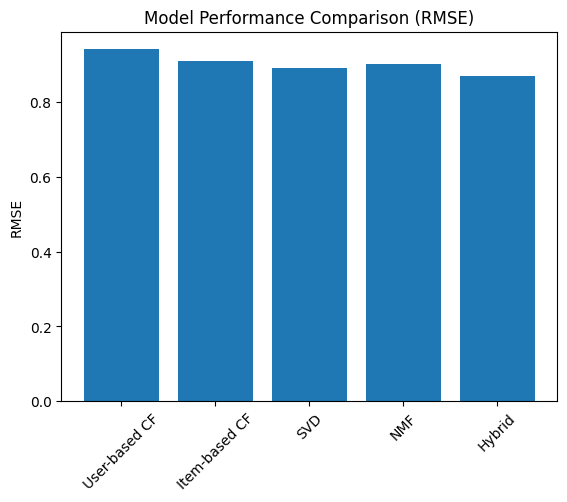

In [17]:
import matplotlib.pyplot as plt

plt.bar(comparison['Model'], comparison['RMSE'])
plt.title('Model Performance Comparison (RMSE)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [19]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load movies dataset
movies = pd.read_csv("/kaggle/input/movielens100k/movies.csv")

# Dummy models (replace with your actual recommendation function)
def recommend_movies(model_name, user_id, k=10):
    # For demo: just return random movies
    return movies['title'].sample(k).tolist()

# Widgets
user_input = widgets.IntText(value=1, description='User ID:')
model_select = widgets.Dropdown(
    options=['User-CF', 'Item-CF', 'SVD', 'NMF', 'Hybrid'],
    description='Model:'
)
top_k_slider = widgets.IntSlider(value=10, min=5, max=20, description='Top K:')
run_button = widgets.Button(description='Get Recommendations', button_style='success')

output = widgets.Output()

# Logic
def on_button_click(b):
    with output:
        output.clear_output()
        user_id = user_input.value
        model_name = model_select.value
        k = top_k_slider.value
        recs = recommend_movies(model_name, user_id, k)
        print(f"🎬 Top {k} recommendations for User {user_id} ({model_name}):")
        for i, movie in enumerate(recs, 1):
            print(f"{i}. {movie}")

run_button.on_click(on_button_click)

# Display the UI
display(user_input, model_select, top_k_slider, run_button, output)


IntText(value=1, description='User ID:')

Dropdown(description='Model:', options=('User-CF', 'Item-CF', 'SVD', 'NMF', 'Hybrid'), value='User-CF')

IntSlider(value=10, description='Top K:', max=20, min=5)

Button(button_style='success', description='Get Recommendations', style=ButtonStyle())

Output()

In [29]:
import pandas as pd
from surprise import Dataset, Reader, SVD, NMF, KNNBasic

# Load your dataset
ratings = pd.read_csv("/kaggle/input/movielens100k/ratings.csv")

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

# Train models
svd = SVD()
svd.fit(trainset)

nmf = NMF()
nmf.fit(trainset)

user_cf = KNNBasic(sim_options={'user_based': True})
user_cf.fit(trainset)

item_cf = KNNBasic(sim_options={'user_based': False})
item_cf.fit(trainset)



Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [30]:
import pickle

models = {
    "user_cf": user_cf,
    "item_cf": item_cf,
    "svd": svd,
    "nmf": nmf
}

for name, model in models.items():
    with open(f"/kaggle/working/{name}_model.pkl", "wb") as f:
        pickle.dump(model, f)
        print(f"{name} saved ✅")


user_cf saved ✅
item_cf saved ✅
svd saved ✅
nmf saved ✅


In [31]:
import pickle

with open("svd_model.pkl", "rb") as f:
    svd = pickle.load(f)

# Example: make a prediction
pred = svd.predict(uid=1, iid=50)
print(pred.est)  # Estimated rating for user 1 and movie 50


3.3625266993154557
